In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Load all the training and test data

In [5]:
data = pd.read_csv("sign_mnist_train.csv")
data_test = pd.read_csv("sign_mnist_test.csv")

y = data.label
X = np.ascontiguousarray(data.iloc[:,1:].values)

y_test = data_test.label
X_test = np.ascontiguousarray(data_test.iloc[:,1:].values)

print(f"Training samples: {X.shape[0]}, test samples: {X_test.shape[0]}")

Training samples: 27455, test samples: 7172


# Visualize data

## View first example of each class in training data

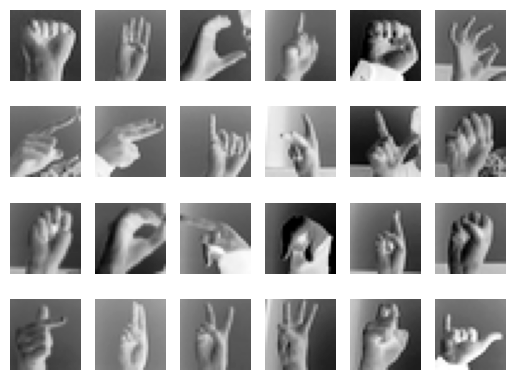

In [10]:
classes = sorted(set(data.label))

fig, axis = plt.subplots(4, 6)

for idx, c in enumerate(classes):
    class_rows = data[data.label == c].iloc[:,1:]

    img = class_rows.iloc[0,:].to_numpy().reshape((28,28))

    i = idx // 6
    j = idx % 6

    axis[i,j].imshow(img, cmap="Greys", vmin=0, vmax=255)
    axis[i,j].axis('off')

## View average image of each class

{0: 1126, 1: 1010, 2: 1144, 3: 1196, 4: 957, 5: 1204, 6: 1090, 7: 1013, 8: 1162, 10: 1114, 11: 1241, 12: 1055, 13: 1151, 14: 1196, 15: 1088, 16: 1279, 17: 1294, 18: 1199, 19: 1186, 20: 1161, 21: 1082, 22: 1225, 23: 1164, 24: 1118}


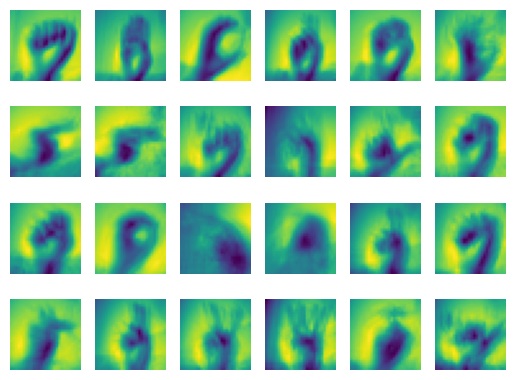

In [5]:
classes = sorted(set(data.label))
class_count = {}

fig, axis = plt.subplots(4, 6)

for idx, c in enumerate(classes):
    class_rows = data[data.label == c].iloc[:,1:]
    class_count[c] = class_rows.shape[0]

    # apply contrast stretching to images before mean
    mins = class_rows.min(axis="columns")
    maxs = class_rows.max(axis="columns")
    class_rows = class_rows.sub(mins, axis=0 ).div(maxs.sub(mins, axis=0), axis=0) * 255

    img = class_rows.mean().round().to_numpy().reshape((28,28))

    i = idx // 6
    j = idx % 6

    axis[i,j].imshow(img)
    axis[i,j].axis('off')

print(class_count)

# Graphing the error values of classifiers

## SVM Classifier

### With different values of C

In [14]:
#c_vals = np.logspace(-3, 0.4, 10)
c_vals = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2]

train_errors = []
#[0.8200327809142233, 0.552759060280459, 0.3511564378073211, 0.14015661992351125, 0.053177927517756296, 0.010307776361318521, 0.00021853942815519556, 0.0, 0.0]
test_errors = []
#[0.8905465699944227, 0.6787506971556052, 0.5037646402677077, 0.31609035136642494, 0.22671500278862244, 0.18028443948689343, 0.16243725599553815, 0.15811489124372557, 0.16034578918014497]

for c in c_vals:
    svm = SVC(kernel="rbf", C=c)
    svm.fit(X, y)
    train_errors.append(1 -svm.score(X, y))
    test_errors.append(1 - svm.score(X_test, y_test))

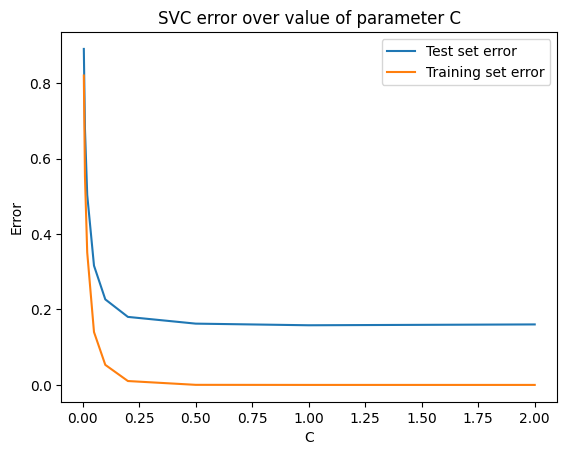

In [20]:
c_vals = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2]

train_errors = [0.8200327809142233, 0.552759060280459, 0.3511564378073211, 0.14015661992351125, 0.053177927517756296, 0.010307776361318521, 0.00021853942815519556, 0.0, 0.0]
test_errors = [0.8905465699944227, 0.6787506971556052, 0.5037646402677077, 0.31609035136642494, 0.22671500278862244, 0.18028443948689343, 0.16243725599553815, 0.15811489124372557, 0.16034578918014497]

# Plot scores
plt.plot(c_vals, test_errors)
plt.plot(c_vals, train_errors)
plt.title("SVC error over value of parameter C")
plt.xlabel("C")
plt.ylabel("Error")
plt.legend(["Test set error", "Training set error"])
plt.show()

### With increasing number of training samples

In [16]:
nsamples = []
#[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000]
nsample_train_errors = []
#[0.08299999999999996, 0.04949999999999999, 0.03433333333333333, 0.02400000000000002, 0.012800000000000034, 0.007000000000000006, 0.004142857142857115, 0.00275000000000003, 0.0016666666666667052, 0.0011999999999999789, 0.0006363636363636571, 0.0003333333333332966, 0.0003076923076923421, 0.0002142857142857224, 0.00019999999999997797, 6.249999999996536e-05, 5.882352941177782e-05, 5.5555555555586444e-05, 5.2631578947415214e-05, 4.999999999999449e-05, 4.7619047619074095e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
nsample_test_errors = []
#[0.42024539877300615, 0.3053541550474066, 0.24790853318460682, 0.21179587283881762, 0.19743446737311765, 0.19046291132180704, 0.1820970440602342, 0.17442833240379252, 0.1709425543781372, 0.16424986056887902, 0.16369213608477418, 0.16341327384272164, 0.16341327384272164, 0.16592303402119357, 0.16550474065811493, 0.16424986056887902, 0.1673173452314557, 0.16452872281093145, 0.16257668711656437, 0.16160066926938088, 0.15992749581706633, 0.15881204684885664, 0.158393753485778, 0.1582543223647518, 0.15992749581706633, 0.15867261572783042, 0.15867261572783042]

for i in range(1000, X.shape[0], 1000):
    nsamples.append(i)
    X_partial = X[0:i, :]
    y_partial = y[0:i]

    svm = SVC(kernel="rbf")
    svm.fit(X_partial, y_partial)
    nsample_train_errors.append(1 -svm.score(X_partial, y_partial))
    nsample_test_errors.append(1 - svm.score(X_test, y_test))

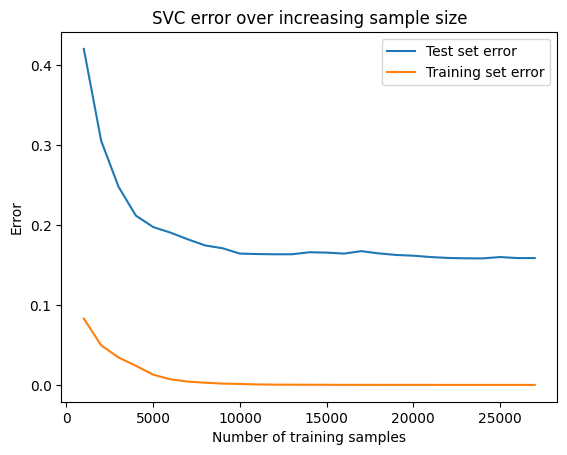

In [17]:
nsamples = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000]
nsample_train_errors = [0.08299999999999996, 0.04949999999999999, 0.03433333333333333, 0.02400000000000002, 0.012800000000000034, 0.007000000000000006, 0.004142857142857115, 0.00275000000000003, 0.0016666666666667052, 0.0011999999999999789, 0.0006363636363636571, 0.0003333333333332966, 0.0003076923076923421, 0.0002142857142857224, 0.00019999999999997797, 6.249999999996536e-05, 5.882352941177782e-05, 5.5555555555586444e-05, 5.2631578947415214e-05, 4.999999999999449e-05, 4.7619047619074095e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
nsample_test_errors = [0.42024539877300615, 0.3053541550474066, 0.24790853318460682, 0.21179587283881762, 0.19743446737311765, 0.19046291132180704, 0.1820970440602342, 0.17442833240379252, 0.1709425543781372, 0.16424986056887902, 0.16369213608477418, 0.16341327384272164, 0.16341327384272164, 0.16592303402119357, 0.16550474065811493, 0.16424986056887902, 0.1673173452314557, 0.16452872281093145, 0.16257668711656437, 0.16160066926938088, 0.15992749581706633, 0.15881204684885664, 0.158393753485778, 0.1582543223647518, 0.15992749581706633, 0.15867261572783042, 0.15867261572783042]
# Plot scores
plt.plot(nsamples, nsample_test_errors)
plt.plot(nsamples, nsample_train_errors)
plt.title("SVC error over increasing sample size")
plt.xlabel("Number of training samples")
plt.ylabel("Error")
plt.legend(["Test set error", "Training set error"])
plt.show()

### Confusion Matrix

In [21]:
svm = SVC(kernel="rbf", C=1.15, gamma=5.36e-07)
svm.fit(X, y)
print(svm.score(X_test, y_test))

0.8404907975460123


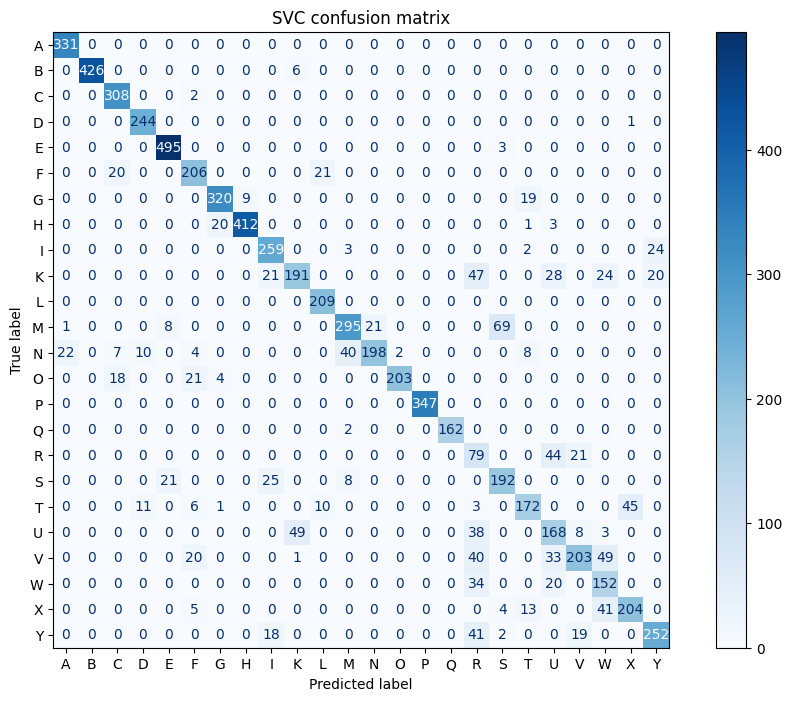

In [37]:
label_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w')
axes = plt.axes()

disp = ConfusionMatrixDisplay.from_estimator(
    svm,
    X_test,
    y_test,
    display_labels=label_names,
    #normalize='true',
    cmap=plt.cm.Blues,
    ax=axes
)
disp.ax_.set_title("SVC confusion matrix")
plt.show()

## k-Nearest Neighbours Classifier

### With increasing number of training samples

In [3]:
nn = KNeighborsClassifier(n_neighbors=5)
nn.fit(X, y)

KNeighborsClassifier()

In [13]:
# Warning: this code cell may cause some memory problems, I don't recommend running it
# the calculated values are commented under the list variables

nsamples = []
nsample_train_errors_kn = []
# up to 19000
#[0.245, 0.14, 0.08466666666666667, 0.058499999999999996, 0.035599999999999965, 0.028833333333333377, 0.019857142857142907, 0.015125000000000055, 0.013333333333333308, 0.010499999999999954, 0.008636363636363664, 0.00708333333333333, 0.005461538461538407, 0.004428571428571448, 0.0040000000000000036, 0.003750000000000031, 0.002882352941176447, 0.0020555555555555882, 0.0019473684210525866]
nsample_test_errors_kn = []
#[0.5455939765755717, 0.42693809258226434, 0.36684327941996653, 0.3259899609592861, 0.3032626882320134, 0.2802565532626883, 0.2647796988287786, 0.2488845510317903, 0.24972113775794758, 0.23842721695482427, 0.2306190741773564, 0.22685443390964866, 0.2251812604573341, 0.22113775794757384, 0.21807027328499717, 0.21556051310652535, 0.21221416620189626, 0.20886781929726717, 0.2070552147239264]


# function for scoring with the k-neighbors classifier, as the standard implementation runs out of memory for large sample sizes
# predicts each row at a time to get total correct predictions, very slowly...
def score_intermediate(model, X, y):
    total = X.shape[0]
    correct = 0

    for i in range(X.shape[0]):
        prediction = model.predict(X[i].reshape(1,-1))[0]
        correct += prediction == y[i]

    return correct / total

# only until 19000 samples, improvement onwards is marginal and it gets really memory intensive
for i in range(1000, X.shape[0] if X.shape[0] < 19000 else 19000, 1000):
    nsamples.append(i)
    X_partial = X[0:i, :]
    print(X_partial.shape)
    y_partial = y[0:i]

    nn = KNeighborsClassifier(n_neighbors=5)
    nn.fit(X_partial, y_partial)
    nsample_train_errors_kn.append(1 - score_intermediate(nn, X_partial, y_partial))
    nsample_test_errors_kn.append(1 - score_intermediate(nn, X_test, y_test))
    #nsample_train_errors_kn.append(1 - nn.score(X_partial, y_partial))
    #nsample_test_errors_kn.append(1 - nn.score(X_test, y_test))

(1000, 784)
(2000, 784)
(3000, 784)
(4000, 784)
(5000, 784)
(6000, 784)
(7000, 784)
(8000, 784)
(9000, 784)
(10000, 784)
(11000, 784)
(12000, 784)
(13000, 784)
(14000, 784)
(15000, 784)
(16000, 784)
(17000, 784)
(18000, 784)
(19000, 784)
(20000, 784)


MemoryError: Unable to allocate 120. MiB for an array with shape (20000, 784) and data type float64

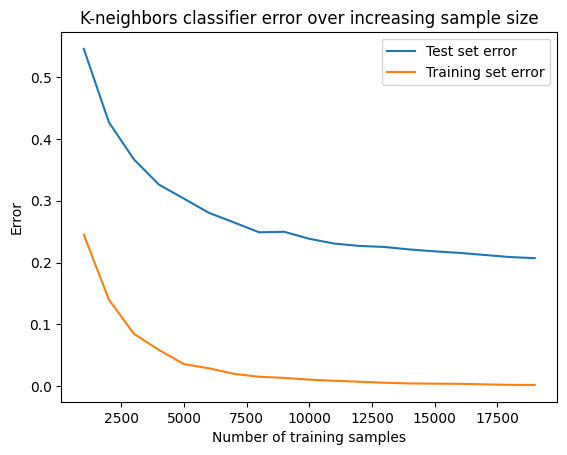

In [16]:
nsamples = list(range(1000, 19001, 1000))
nsample_train_errors_kn = [0.245, 0.14, 0.08466666666666667, 0.058499999999999996, 0.035599999999999965, 0.028833333333333377, 0.019857142857142907, 0.015125000000000055, 0.013333333333333308, 0.010499999999999954, 0.008636363636363664, 0.00708333333333333, 0.005461538461538407, 0.004428571428571448, 0.0040000000000000036, 0.003750000000000031, 0.002882352941176447, 0.0020555555555555882, 0.0019473684210525866]
nsample_test_errors_kn = [0.5455939765755717, 0.42693809258226434, 0.36684327941996653, 0.3259899609592861, 0.3032626882320134, 0.2802565532626883, 0.2647796988287786, 0.2488845510317903, 0.24972113775794758, 0.23842721695482427, 0.2306190741773564, 0.22685443390964866, 0.2251812604573341, 0.22113775794757384, 0.21807027328499717, 0.21556051310652535, 0.21221416620189626, 0.20886781929726717, 0.2070552147239264]

# Plot scores
plt.plot(nsamples, nsample_test_errors_kn)
plt.plot(nsamples, nsample_train_errors_kn)
plt.title("K-neighbors classifier error over increasing sample size")
plt.xlabel("Number of training samples")
plt.ylabel("Error")
plt.legend(["Test set error", "Training set error"])
plt.show()

### Confusion matrix

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

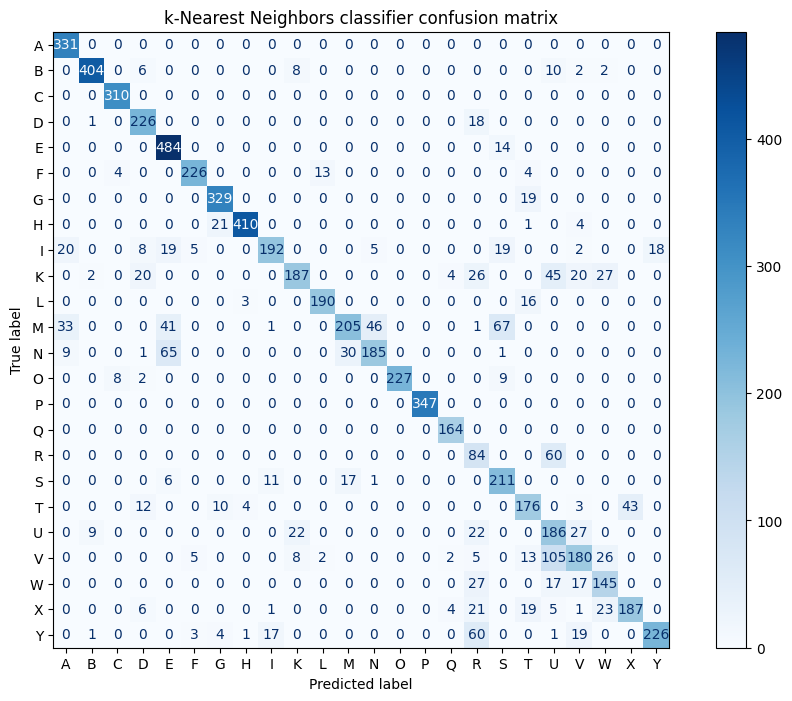

In [46]:
label_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w')
axes = plt.axes()

disp = ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    y_test,
    display_labels=label_names,
    #normalize='true',
    cmap=plt.cm.Blues,
    ax=axes
)
disp.ax_.set_title("k-Nearest Neighbors classifier confusion matrix")
plt.show()

# Training and Prediction Time

In [6]:
from time import time

## SVC Times over training set size

In [9]:
n_samples = []
svc_train_times = []
svc_prediction_times = []

for i in range(4000, X.shape[0], 4000):
    n_samples.append(i)

    svm = SVC(kernel="rbf", C=1.15, gamma=5.36e-07)

    tic = time()
    svm.fit(X[0:i,:], y[0:i])
    svc_train_times.append(time() - tic)

    tic = time()
    svm.predict(X_test)
    svc_prediction_times.append(time() - tic)

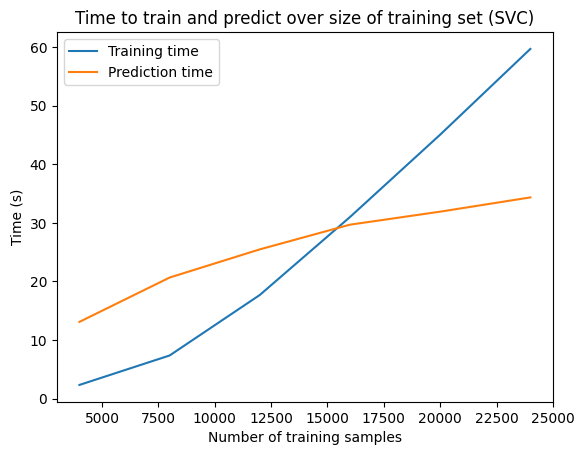

In [11]:
# Plot scores
plt.plot(n_samples, svc_train_times)
plt.plot(n_samples, svc_prediction_times)
plt.title("Time to train and predict over size of training set (SVC)")
plt.xlabel("Number of training samples")
plt.ylabel("Time (s)")
plt.legend(["Training time", "Prediction time"])
plt.show()

## KNN times

In [12]:
n_samples = []
knn_train_times = []
knn_prediction_times = []

for i in range(4000, X.shape[0], 4000):
    n_samples.append(i)

    knn = KNeighborsClassifier(n_neighbors=1)

    tic = time()
    knn.fit(X[0:i,:], y[0:i])
    knn_train_times.append(time() - tic)

    tic = time()
    knn.predict(X_test)
    knn_prediction_times.append(time() - tic)

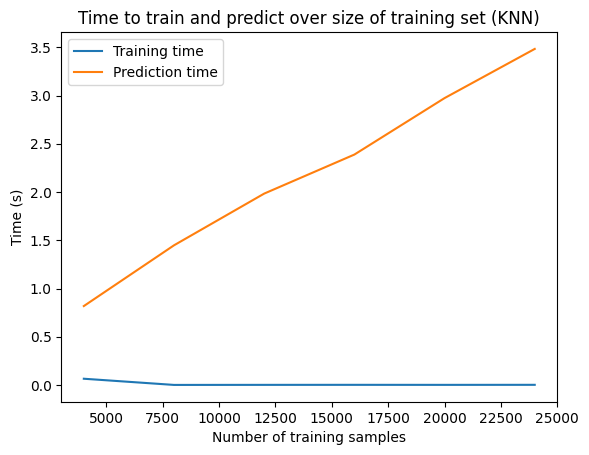

In [13]:
# Plot scores
plt.plot(n_samples, knn_train_times)
plt.plot(n_samples, knn_prediction_times)
plt.title("Time to train and predict over size of training set (KNN)")
plt.xlabel("Number of training samples")
plt.ylabel("Time (s)")
plt.legend(["Training time", "Prediction time"])
plt.show()

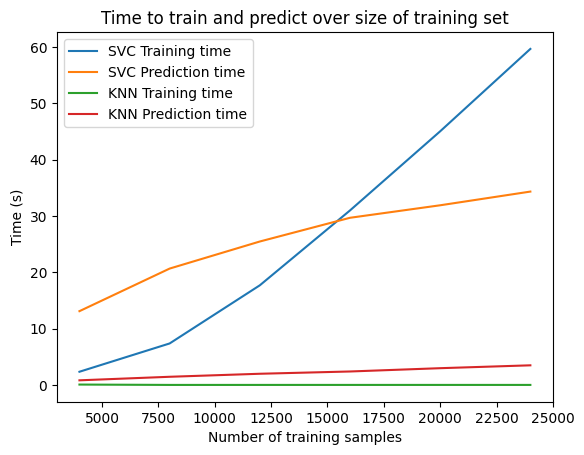

In [14]:
# Plot scores
plt.plot(n_samples, svc_train_times)
plt.plot(n_samples, svc_prediction_times)
plt.plot(n_samples, knn_train_times)
plt.plot(n_samples, knn_prediction_times)
plt.title("Time to train and predict over size of training set")
plt.xlabel("Number of training samples")
plt.ylabel("Time (s)")
plt.legend(["SVC Training time", "SVC Prediction time", "KNN Training time", "KNN Prediction time"])
plt.show()

# Split dataset to test hypothesis of different testing set origin

In [17]:
from sklearn.model_selection import train_test_split

X2, X2_test, y2, y2_test = train_test_split(X, y, test_size=0.2, shuffle=True)

svc = SVC()
svc.fit(X2, y2)
print(svc.score(X2, y2))
print(svc.score(X2_test, y2_test))

knn = KNeighborsClassifier()
knn.fit(X2, y2)
print(knn.score(X2, y2))
print(knn.score(X2_test, y2_test))

1.0
0.9998178838098707
0.9990438900018211
0.9979967219085777
